## Part 1 - Exploratory Data Analysis

This notebook is my response to the take-home challenge provided by Ultimate. This first part is exploring the login times of users in a particular, unnamed geographic region. I will begin by loading the data nad superficially inspecting it to get a sense of the data I have to use. 

In [1]:
import pandas as pd
import numpy as np
import datetime
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import json

In [2]:
login_df = pd.read_json('logins.json')
login_df.head()

,login_time
0,1970-01-01 20:13:18
1,1970-01-01 20:16:10
2,1970-01-01 20:16:37
3,1970-01-01 20:16:36
4,1970-01-01 20:26:21


In [3]:
login_df.tail()

,login_time
93137,1970-04-13 18:50:19
93138,1970-04-13 18:43:56
93139,1970-04-13 18:54:02
93140,1970-04-13 18:57:38
93141,1970-04-13 18:54:23


In [4]:
login_df.describe()

,login_time
count,93142
unique,92265
top,1970-02-12 11:16:53
freq,3
first,1970-01-01 20:12:16
last,1970-04-13 18:57:38


In [5]:
login_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 93142 entries, 0 to 93141
Data columns (total 1 columns):
login_time    93142 non-null datetime64[ns]
dtypes: datetime64[ns](1)
memory usage: 727.8 KB


I have a little more than 93,000 values over a 3.5 month period for this exploration. I have been asked to aggregate the data in 15 minute intervals and try and discover some underlying patterns of the demand. I have also been asked to include details of the daily cycles.

First to break the data into 15 minute intervals.

In [6]:
login_df.set_index('login_time', inplace=True)
login_df['Counts'] = 1
login_df = (1*login_df.resample('15T').sum()).fillna(0)
login_df.head()

,Counts
login_time,
1970-01-01 20:00:00,2
1970-01-01 20:15:00,6
1970-01-01 20:30:00,9
1970-01-01 20:45:00,7
1970-01-01 21:00:00,1


Text(0.5,1,'1970-01-01 to 1970-04-13')

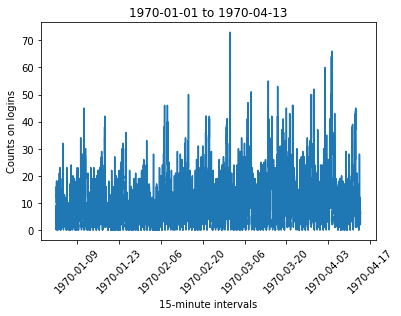

In [7]:
plt.plot(login_df)
plt.xticks(rotation=45)
plt.xlabel('15-minute intervals')
plt.ylabel('Counts on logins')
plt.title('1970-01-01 to 1970-04-13')

The graph above shows the login activity of all four months. It is a difficult to distinguish between the months on basis of the xticks alone .The graph below shows the same information over the same period but with different colors to help see the differences between the months.

Text(0,0.5,'Counts on logins')

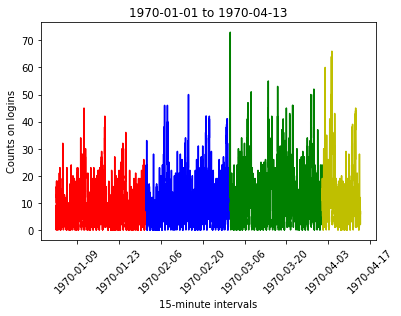

In [8]:
plt.title('1970-01-01 to 1970-04-13')
plt.plot(login_df['1970-01-01': '1970-01-31'], 'r')
plt.plot(login_df['1970-02-01': '1970-02-28'], 'b')
plt.plot(login_df['1970-03-01': '1970-03-31'], 'g')
plt.plot(login_df['1970-04-01': '1970-04-13'], 'y')
plt.xticks(rotation=45)
plt.xlabel('15-minute intervals')
plt.ylabel('Counts on logins')

We can see that the yellow portion for the fourth month, April, is shorter than the other portions. That is because data for only 17 days of April were provided.

We can see a spike in engagement in the very beginning of March. This could be an outlier or perhaps justified by a spike of new employees getting familiar with the Ultimate environment. I can also see a slight increase in engagement over the months. Either the Ultimate family has grown in number or more services are being provided through their online systems, encouraging employees to be online more and more often.

Now that we've seen the monthly correlation, I will break the next visuals into describing the weekly and daily activity. 

In [9]:
login_df['weekday'] = login_df.index.weekday
login_df['hour'] = login_df.index.hour

Text(0.5,1,'Average of Logins for Different Weekdays')

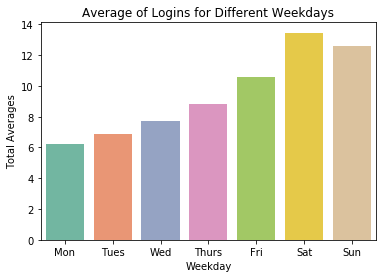

In [10]:
wkday_avg = login_df.groupby('weekday').mean()
wkday_avg.index = ['Mon', 'Tues', 'Wed','Thurs','Fri', 'Sat', 'Sun']
sns.barplot(x='index', y='Counts', data=wkday_avg.reset_index(), palette="Set2")
plt.ylabel('Total Averages')
plt.xlabel('Weekday')
plt.title('Average of Logins for Different Weekdays')

The user engagement increases towards the end of the week and spikes on Saturday. It is interesting because these days are nomally associated with weekends and entertainment. Ultimate Technologies Inc. did not say in its description of the take-home challenge that the logins were from their own company's engagement. It is possible that the data provided is from an online game or other entertainment site, possibly Netflix or Kindle. Ultimate Technologies itself is not an entertainment company.

Text(0.5,1,'Average of Logins for Different Hours in A Daily Cycle')

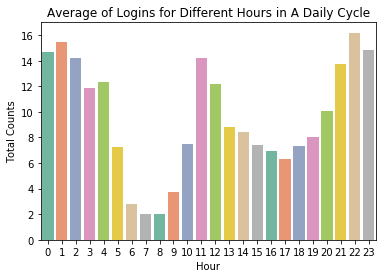

In [11]:
hour_count = login_df.drop('weekday', axis=1).groupby('hour').mean()
sns.barplot(x='hour', y='Counts', data=hour_count.reset_index(), palette="Set2")
plt.ylabel('Total Counts')
plt.xlabel('Hour')
plt.title('Average of Logins for Different Hours in A Daily Cycle')

The two or three highest times of engagement are 12 o'clock noon and 12 o'clock midnight with the highest engagements happening right before or right after midnight. The down times in engagement are around 7:30 am and 5:00 pm, times that are regularly associated with rush hour as people go to and from their school or work and home.

The hourly engagement patterns emphasize that this data probably belongs to an entertainment service and most of their user engagement happens after work. The lowest period of engagement is in the morning rush hour. The high engagement spike during the day hours coincides with the workday lunchtime. It is possible that users take advantage of their lunch hour by logging into this entertainment platform.

This concludes my assessment of Part 1.

## Part 2 - Experiment and Metrics Design

*The neighboring cities of Gotham and Metropolis have complementary circadian rhythms: on weekdays, Ultimate Gotham is most active at night, and Ultimate Metropolis is most active during the day. On weekends, there is reasonable activity in both cities. However, a toll bridge, with a two­way toll, between the two cities causes driver partners to tend to be exclusive to each city. The Ultimate managers of city operations for the two cities have proposed an experiment to encourage driver partners to be available in both cities, by reimbursing all toll costs.*

*1.What would you choose as the key measure of success of this experiment in encouraging driver partners to serve both cities, and why would you choose this metric?*

The key measure of success in this experiment would be profit. The first two times a driver partner took advantage of the reimbursement policy would be to test it out, to decide for themselves through experience if the trip was made worth the cost and time because of a toll reimbursement. Does consistent toll reimbursement encourage driver partners to expand their geographic range of service? Some driver partners may decide the reimbursement is not worth it, in which case, the overall indicator that the experiment was a general success would be found in profit increase. If the profit does not change, then Ultimate would be able to see that toll reimbursements are not enough to encourage driver partners to cross cities.

*2.Describe a practical experiment you would design to compare the effectiveness of the proposed change in relation to the key measure of success. Please provide details on:*
 - *how you will implement the experiment.*
 - *what statistical test(s) you will conduct to verify the significance of the observation.*
 - *how you would interpret the results and provide recommendations to the city operations team along with any caveats.*

Offer a promotion to half of the driver partners from each city. Since the two cities have complementary circadian phythms, this would get the most complete result. Be sure the mix of recipients is a mix of new drivers and old, drivers that have activity spokes on the weekends and on the weekdays, drivers that take an assorted number of people on trips.

You will have four sets of consequent data. Gotham drivers who did or did not recieve the promotion and Metropolis drivers who did or did not recieve the promotion. You can run a hypothesis test within each city to see if the promotions worked against those who were not offered promotions. Use the p-value to validate. You can also run a hypothesis between the two cities to see if they reacted to the promotion the same way or did one city have more engagement with the city than the other. 

Linear and regression modelling would also tell whether the cities follow the same circadian rhythms with the promotion in play. Perhaps it is possible that the promotion narrowed the periods of the cycles. This would still be in Ultimate's favour as it would create more engagement cycles.

The recommendations to the city would depend on the answers. It could be that the promotion has no effect or a negative efect on the driver partners. In which case, the recommendation would be that the promotion was discontinued. It could be that the promotion recieved a stronger reception in one city than another in which case the recommendation would be to only continue the promotion and widen it to all driver partners within that city. If it Ultimate decides that offering reimbursements is not a long-term feasible solution, they may ask the city to lower its toll expectations.

## Part 3 - Predictive Modelling

In [12]:
file = open('ultimate_data_challenge.json', 'r')
retain_df = pd.DataFrame(json.load(file))
file.close()

In [13]:
retain_df.head().T

,0,1,2,3,4
avg_dist,3.67,8.26,0.77,2.36,3.13
avg_rating_by_driver,5,5,5,4.9,4.9
avg_rating_of_driver,4.7,5,4.3,4.6,4.4
avg_surge,1.1,1,1,1.14,1.19
city,King's Landing,Astapor,Astapor,King's Landing,Winterfell
last_trip_date,2014-06-17,2014-05-05,2014-01-07,2014-06-29,2014-03-15
phone,iPhone,Android,iPhone,iPhone,Android
signup_date,2014-01-25,2014-01-29,2014-01-06,2014-01-10,2014-01-27
surge_pct,15.4,0,0,20,11.8
trips_in_first_30_days,4,0,3,9,14


In [14]:
retain_df.describe()

,avg_dist,avg_rating_by_driver,avg_rating_of_driver,avg_surge,surge_pct,trips_in_first_30_days,weekday_pct
count,50000.000000,49799.000000,41878.000000,50000.000000,50000.000000,50000.000000,50000.000000
mean,5.796827,4.778158,4.601559,1.074764,8.849536,2.278200,60.926084
std,5.707357,0.446652,0.617338,0.222336,19.958811,3.792684,37.081503
min,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000
25%,2.420000,4.700000,4.300000,1.000000,0.000000,0.000000,33.300000
50%,3.880000,5.000000,4.900000,1.000000,0.000000,1.000000,66.700000
75%,6.940000,5.000000,5.000000,1.050000,8.600000,3.000000,100.000000
max,160.960000,5.000000,5.000000,8.000000,100.000000,125.000000,100.000000


In [15]:
retain_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 12 columns):
avg_dist                  50000 non-null float64
avg_rating_by_driver      49799 non-null float64
avg_rating_of_driver      41878 non-null float64
avg_surge                 50000 non-null float64
city                      50000 non-null object
last_trip_date            50000 non-null object
phone                     49604 non-null object
signup_date               50000 non-null object
surge_pct                 50000 non-null float64
trips_in_first_30_days    50000 non-null int64
ultimate_black_user       50000 non-null bool
weekday_pct               50000 non-null float64
dtypes: bool(1), float64(6), int64(1), object(4)
memory usage: 4.2+ MB


There are missing values in avg_rating_by_driver, avg_rating_of_driver, and phone. Since none of those have to do with dates, I will answer the first question of Part 3 of the challenge first before dealing with the missing data/

In [16]:
retain_df['last_trip_date'] = pd.to_datetime(retain_df['last_trip_date'])
retain_df['signup_date'] = pd.to_datetime(retain_df['signup_date'])

In [17]:
retain_df['active_ind'] = ((retain_df['last_trip_date']) < (max(retain_df['last_trip_date'])) - pd.Timedelta("30 days")) 
retain_df.active_ind.value_counts()

True     31196
False    18804
Name: active_ind, dtype: int64

In [19]:
retain_df.active_ind.value_counts()[0]/len(retain_df.active_ind)

0.37608

18804/31196 users were retained. 37.6%.

I will see if I can determine which city the most retained users came from and how being an ultimate_black_user factors into the decision to keep using the service.

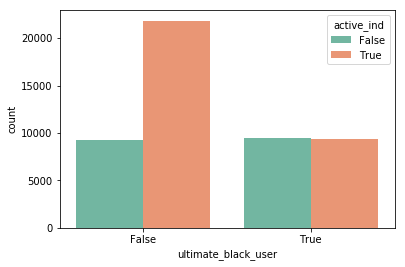

In [20]:
sns.countplot(x='ultimate_black_user', data=retain_df, hue='active_ind', palette="Set2")

It seems that more retained users came from regular accounts. Being an Ultimate Black User (UBU) did not influence the decision to stay on as a user. A lot of users who were not UBUs decided to stay.

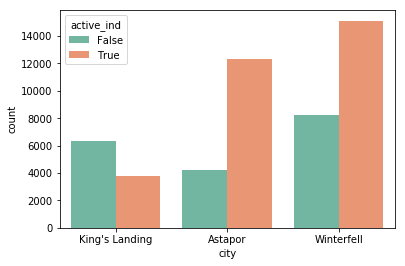

In [21]:
sns.countplot(x='city', data=retain_df, hue='active_ind', palette="Set2")

Many users from King's Landing did not decide to stay on with the program. More than twice the number of users who decided not to stay on did stay on in Astapor City. Winterfell had the greatest amount of individual retained users, although Astapor City has the greatest rate of retained users.

The second question of the third part is to build a predictive model. We cannot do that with the null values we mentioned before. There are missing values in avg_rating_by_driver, avg_rating_of_driver, and phone. I can impute the averages for the ratings. This would not bias my mean parameter estimate but it will make my standard deviation estimate inaccurate. Since I do not plan on needing an accurate standard deviation for the analysis, I will impute the averages taken from cell 111.

The missing values in the phone category are imputed with 'None' as it is possible that the user left the phone descrpiptor empty because they did not have one. They could be using email or the app on an iPad or tablet instead.

In [22]:
retain_df['avg_rating_by_driver'] = retain_df['avg_rating_by_driver'].fillna(4.8)
retain_df['avg_rating_of_driver'] = retain_df['avg_rating_of_driver'].fillna(4.6)
retain_df['phone'] = retain_df['phone'].fillna('None')

In [23]:
retain_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 13 columns):
avg_dist                  50000 non-null float64
avg_rating_by_driver      50000 non-null float64
avg_rating_of_driver      50000 non-null float64
avg_surge                 50000 non-null float64
city                      50000 non-null object
last_trip_date            50000 non-null datetime64[ns]
phone                     50000 non-null object
signup_date               50000 non-null datetime64[ns]
surge_pct                 50000 non-null float64
trips_in_first_30_days    50000 non-null int64
ultimate_black_user       50000 non-null bool
weekday_pct               50000 non-null float64
active_ind                50000 non-null bool
dtypes: bool(2), datetime64[ns](2), float64(6), int64(1), object(2)
memory usage: 4.3+ MB


In [24]:
new_rdf = retain_df.drop('signup_date', axis=1)

In [25]:
new_rdf = new_rdf.drop('last_trip_date', axis=1)

In [26]:
new_rdf = pd.get_dummies(new_rdf, prefix='is')

In [27]:
X, y = new_rdf.drop(['active_ind', 'avg_surge'], axis=1), new_rdf['active_ind']

In [28]:
from sklearn.model_selection import train_test_split

train_X, test_X, train_y, test_y = train_test_split(X, y, train_size=0.85, test_size=0.15, stratify=y)

In [29]:
from sklearn.ensemble import GradientBoostingClassifier
classifier = GradientBoostingClassifier(verbose=True, n_estimators=200)
classifier.fit(train_X, train_y)
classifier.score(test_X, test_y)

      Iter       Train Loss   Remaining Time 
         1           1.2797           18.37s
         2           1.2435           12.80s
         3           1.2118           10.59s
         4           1.1840            9.37s
         5           1.1619            8.90s
         6           1.1415            8.35s
         7           1.1231            7.97s
         8           1.1076            7.68s
         9           1.0881            7.47s
        10           1.0719            7.28s
        20           0.9927            6.24s
        30           0.9578            5.75s
        40           0.9394            5.34s
        50           0.9280            4.98s
        60           0.9211            4.69s
        70           0.9163            4.31s
        80           0.9122            3.93s
        90           0.9082            3.60s
       100           0.9048            3.25s
       200           0.8864            0.00s


0.7794666666666666

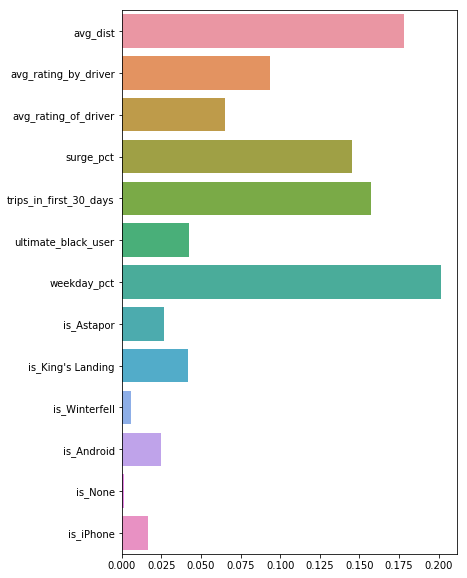

In [30]:
plt.figure(figsize=(6,10))
sns.barplot(y=X.columns, x=classifier.feature_importances_)

I chose a Gradient Booster to be the predictor as to whether future users will be retained. It is expressing 77.9% accuracy which I am satisfied with. A RandomForestClassifier and Regressor was attempted but the parameters could not meet the data and the attempt went unsuccessfully.

As shown in the feature importance above, the percent of a user's trips occuring during the weekday feature is the heaviest category in predicting retention of users and the average distance of the trip is the second most significant feature in predicting retention.

My recommendations would be to offer promotions to reward users who make trips using the service frequently during the weekdays and another promotion, not dissimilar, to reward users who travel a certain threshold to encourage use of the service. For example, the service Presto in the Greater Toronto Area gave discounted trips to users who made more than 45 trips a month. Long distance trips were also discounted if more than one method of transportation was needed for the user to arrive at their destination.

Another recommendation would be to increase operations in Astapor City as they have a high rate of conversion. See if what is unique about Astapor City can be replicated in the other cities.

That is the end of my submission and response to the Ultimate Technologies Inc. take-home challenge.